In [ ]:
# Abdülhalim YAYDEMİR

Dosya bilgisi :

P5 pgm formatı
genişlik(width)= 746
yükseklik(height)= 976
maxval= 255


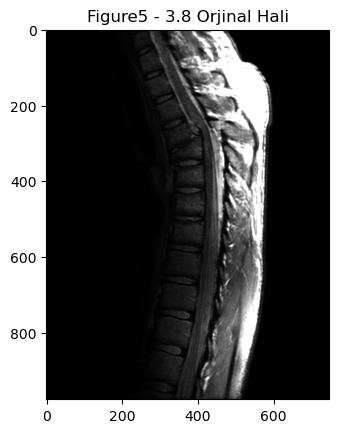

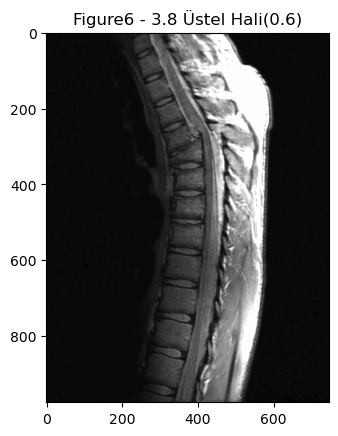

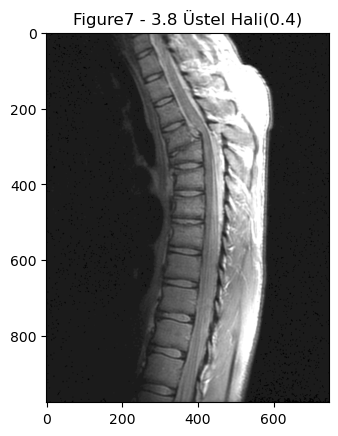

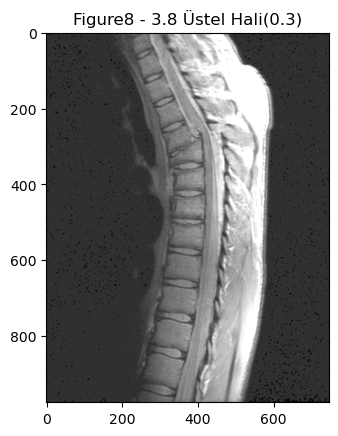

In [5]:
import matplotlib.pyplot as plt # görüntüyü bastırmak için gereklidir
import numpy as np # array işlemleri için gerekli
import math # matematiksel işlemler için gerekli


#################functions#################
def üstel(b,x,y):
    b=math.floor(x*(float(b)**y))
    return b
###########################################


#Fig0308(a)(fractured_spine).pgm dosyası 'rb' modunda açılarak okundu.
with open("Fig0308(a)(fractured_spine).pgm", "rb") as fileObject:
    fileContent=fileObject.read()



    #dosyanın ilk iki karakterine bakılarak P5 formatı olup olmadığına bakıldı
    print('Dosya bilgisi :\n')
    i=0
    while fileContent[i]!=10:
        if i==0:
            if (fileContent[0]==80) & (fileContent[1]==53):
                print('P5 pgm formatı')  
            else:
                print('P5 pgm formatı değil')
        i=i+1

    
    
    # '#' ile başlayan satır geçildi.
    i=i+1
    while fileContent[i]!=10:
        if fileContent[i]==35:
            while fileContent[i]!=10:
                i=i+1
    
    
     
    # genişlik yükseklik bilgileri yazdırıldı
    i=i+1
    while fileContent[i]!=10:
        if fileContent[i]==35:
            while fileContent[i]!=10:
                i=i+1  
        else:
            string=[]
            while fileContent[i]!=32:
                width=chr(fileContent[i])
                string.append(width)       
                i=i+1
                
            string=''.join(string)
            width=int(string)
            print("genişlik(width)=",width)
            i=i+1
            string=[]
            
            while fileContent[i]!=10:
                height=chr(fileContent[i])
                string.append(height)
                i=i+1
                
            string=''.join(string)
            height=int(string)
            print("yükseklik(height)=",height)
                   
             
                
            
    # maxval değeri yazdırıldı
    i=i+1
    string=[]
    while fileContent[i]!=10:
        maxval=chr(fileContent[i])
        string.append(maxval)       
        i=i+1
    
    string=''.join(string)
    maxval=int(string)
    print("maxval=",maxval)
    
    
    i=i+1
    b=i


    # orjinal görüntüyü ekrana yazdırmak için oluşturuldu
    fileContent2=bytearray(fileContent)

    
    # orjinal pikseller imshow() komutunda kullanılmak üzere arraya geçirildi
    i=b
    f2=np.arange(height*width).reshape((height,width))      
    for m in range(height):
        for n in range(width):
            f2[m][n]=fileContent2[i]
            i=i+1    
    
    
    # orjinal görüntü ekrana yazdırıldı
    plt.figure()
    plt.title("Figure5 - 3.8 Orjinal Hali")
    plt.imshow(f2,cmap='gray',vmin=0, vmax=255)   
    
    
    
    
    # pikseller derece(üstel) işlemden geçirildiler
    y=[0.6,0.4,0.3]
    # c değeri 1 den farklı ayarlandı
    c=[255.0/(255.0**y[0]),255.0/(255.0**y[1]),255.0/(255.0**y[2])]
    dosya_isim=["3.8(üstel-0.6).pgm","3.8(üstel-0.4).pgm","3.8(üstel-0.3).pgm"]
    figure=["Figure6 - 3.8 Üstel Hali(0.6)","Figure7 - 3.8 Üstel Hali(0.4)","Figure8 - 3.8 Üstel Hali(0.3)"]
        
    for a in range(3):
        i=b
        j=1
        fileContent1=bytearray(fileContent)
        while 1:   
            fileContent1[i]=üstel(fileContent1[i],c[a],y[a])
            i=i+1
            j=j+1
            if j==height*width+1:
                break
        
        
        
        # üstel işleme alınmış pikseller imshow() komutunda kullanılmak üzere arraya geçirildi
        i=b
        f=np.arange(height*width).reshape((height,width))      
        for m in range(height):
            for n in range(width):
                f[m][n]=fileContent1[i]
                i=i+1
        
        
        
        # dosyaya yazdırılmak için byte tipine dönüştürüldü
        fileContent1=bytes(fileContent1)
        
    
        
        # dosyanın yeni hali 3.8(üstel-0.6,0.4,0.3).pgm isimli dosyalara yazdırıldı
        with open(dosya_isim[a], "wb") as fileObject:
            fileObject.write(fileContent1)  
 

        # işlenmiş görüntü ekrana yazdırıldı
        plt.figure()
        plt.title(figure[a])
        plt.imshow(f,cmap='gray',vmin=0, vmax=255)

# Sonuç

In [ ]:
# Bu bölümde görüntü üstel işlemden geçirilmiştir
# formülde gama değişkeni yerine sırayla 0.6,0.4 ve 0.3 değerleri koyulmuştur
# c değeri 255 piksel girişine 255 piksel çıkışı elde edilecek şekilde değiştirilmiştir
# görüntüler incelendiğinde figure5'de yani orjinal görüntüde karanlıkta kalan kısımlar gama değeri azaltıldıkça daha anlaşılır hale gelmekte